### CDS API Example

[Climate Data Store (CDS)](https://cds.climate.copernicus.eu/cdsapp#!/home) offers a lot of free and open data, but requires creation of a free account to use. [ECMWF's instructions](https://confluence.ecmwf.int/display/CKB/Climate+Data+Store+%28CDS%29+documentation) about the use of Climate Data Store are good way to get to know the different ways you can request data from CDS. The Data Store itself also has [short instructions](https://cds.climate.copernicus.eu/api-how-to) to the use of CDS API.  

**Packages:**

- cdsapi
    - *for CDS data access*
- pandas 
    - *tool for reading data*, *data analysis and manipulation*
- xarray 
    - *for handling of multidimensional arrays*
- urllib
    - urlopen *-command for opening file location*

**For Plotting:**

- matplotlib

- cartopy 
    - *for processing geospatial data and creating maps*

In [2]:
import cdsapi
import xarray as xr
import pandas as pd
from urllib.request import urlopen

Note that in addition to these packages you need to have a file .cdsapic which contains:

>```url: https://cds.climate.copernicus.eu/api/v2 ```
>
>```key: <UID>:<API key>  ```

You can find your UID and API key numbers from the page https://cds.climate.copernicus.eu/user 

In [3]:
#requires the account and related CDS API credentials (UID & API Key)
cds = cdsapi.Client()

In this example we will study [ERA5 Monthly Averaged Data on Single Levels From 1959 to Present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form) -dataset. 

Easiest way to create an API request is to use the web interface since each dataset can have very different options, variable names and limits. After finding a dataset go to the page "Download data" to select parts of data you are interested in and then click "Show API Reguest".

In [4]:
#CDS API request
file = cds.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '2m_dewpoint_temperature', '2m_temperature', 'mean_sea_level_pressure', 'sea_surface_temperature',
            'high_cloud_cover', 'low_cloud_cover', 'surface_pressure', 'total_precipitation',
        ],
        'year': '2018',
        'month': '06',
        'time': '00:00',
    }) 

2022-08-03 11:27:22,540 INFO Welcome to the CDS
2022-08-03 11:27:22,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2022-08-03 11:27:22,657 INFO Request is completed


In [5]:
#in this function downloading the netCDF-file is optional and requested data is stored right away into xarray.Dataset (Note that data formats varie between diffrent datasets)
def get_data(file, download):
    #downloading the file 
    if download:
        file.download('./output.nc')

    #returning requested data as xarray dataset
    with urlopen(file.location) as f:
        return xr.open_dataset(f.read())

In [6]:
#loading into the memory as xarray.Dataset 
ds_out = get_data(file, False)
ds_out

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-06-01
Data variables:
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    hcc        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-03 07:55:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
#choosing variable 2 meter temperature
tas = ds_out.t2m
tas

<xarray.DataArray 't2m' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-06-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Now the data can for example be visualised with matplotlib and cartopy. 

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)>
array([[-2.7282715e-02, -2.7282715e-02, -2.7282715e-02, ...,
        -2.7282715e-02, -2.7282715e-02, -2.7282715e-02],
       [-5.9417725e-02, -5.9417725e-02, -5.9417725e-02, ...,
        -5.9417725e-02, -5.9417725e-02, -5.9417725e-02],
       [-4.8156738e-02, -4.8156738e-02, -4.6539307e-02, ...,
        -4.8156738e-02, -4.8156738e-02, -4.8156738e-02],
       ...,
       [-4.4767487e+01, -4.4769089e+01, -4.4772308e+01, ...,
        -4.4764282e+01, -4.4764282e+01, -4.4765884e+01],
       [-4.4910446e+01, -4.4910446e+01, -4.4910446e+01, ...,
        -4.4905624e+01, -4.4908844e+01, -4.4908844e+01],
       [-4.5320038e+01, -4.5320038e+01, -4.5320038e+01, ...,
        -4.5320038e+01, -4.5320038e+01, -4.5320038e+01]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 201

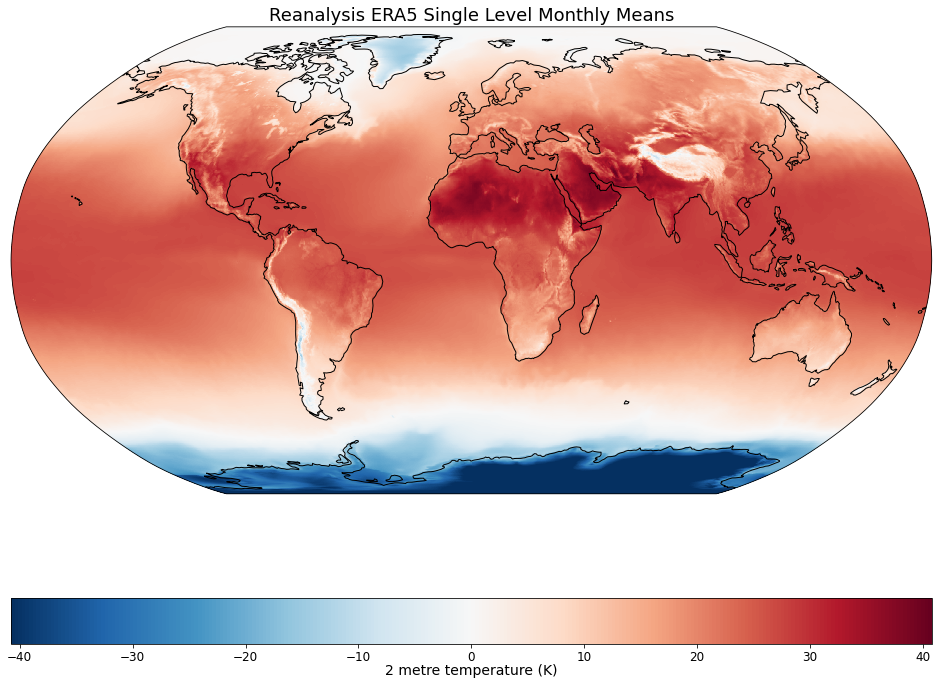

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#defining figure sizes and map projection
fig = plt.figure(figsize=(16.5,12.75))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

#determining data, longnitudes and latitudes
data = tas.squeeze() - 273.15
lons = tas['longitude']
lats = tas['latitude']
print(data)

mesh = ax.pcolormesh(lons, lats, data, transform = ccrs.PlateCarree(), cmap='RdBu_r', vmin=-data.max(), vmax=data.max())

# set the title
ax.set_title(f'Reanalysis ERA5 Single Level Monthly Means', fontsize=18)

# set the colorbar
col = fig.colorbar(mesh,orientation='horizontal')
col.set_label(f'{tas.long_name} ({tas.units})', labelpad=0, size=14)
col.ax.tick_params(labelsize=12)

In [9]:
#low cloud cover data
clouds = ds_out.lcc
clouds

<xarray.DataArray 'lcc' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-06-01
Attributes:
    units:      (0 - 1)
    long_name:  Low cloud cover

<xarray.DataArray 'lcc' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2018-06-01
Attributes:
    units:      (0 - 1)
    long_name:  Low cloud cover


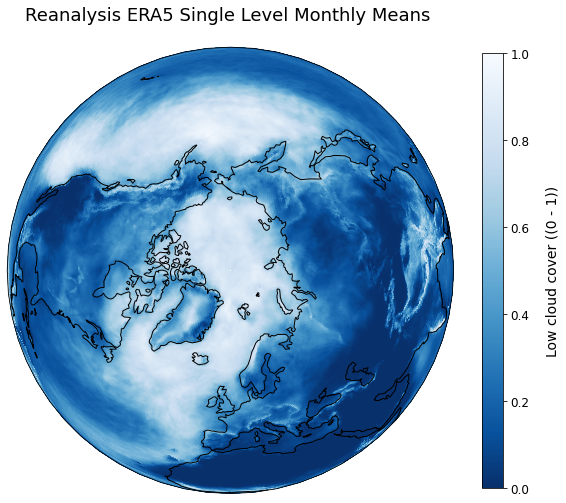

In [10]:
#defining figure sizes and map projection
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0))
ax.set_global()
ax.coastlines()

#determining data, longnitudes and latitudes
data = clouds.squeeze()
lons = clouds['longitude']
lats = clouds['latitude']
print(data)

mesh = ax.pcolormesh(lons, lats, data, transform = ccrs.PlateCarree(), cmap='Blues_r', vmin=0.0, vmax=1.0)

# set the title
ax.set_title(f'Reanalysis ERA5 Single Level Monthly Means \n', fontsize=18)

# set the colorbar
col = fig.colorbar(mesh, shrink=0.8)
col.set_label(f'\n{clouds.long_name} ({clouds.units})', labelpad=0, size=14)
col.ax.tick_params(labelsize=12)